<div align="center"><font size=6>Introduction to Neural Networks</font></div>

# Sigmoid and Tanh Activation Functions

How do the weights affect the shape of the `sigmoid` function?  

We will use [Jupyter Ipywidgets](https://ipywidgets.readthedocs.io/en/stable/index.html) to investigate this. For plotting examples, see [Ipywidgets with matplotlib](https://kapernikov.com/ipywidgets-with-matplotlib/).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [3]:
slider = widgets.FloatSlider()
slider

FloatSlider(value=0.0)

In [5]:
slider.value

48.7

In [6]:
slider

FloatSlider(value=48.7)

In [7]:
def pick_w(w):
    print('In pick_w, w is', w)

widgets.interact(pick_w, w=5.5);

interactive(children=(FloatSlider(value=5.5, description='w', max=16.5, min=-5.5), Output()), _dom_classes=('w…

In [9]:
w_trace = []

def pick_w(w):
    print('In pick_w, w is', w)
    w_trace.append(w)
    plt.plot(w_trace)
    plt.ylim(-10, 10)
    plt.show()
    
interactive_plot = widgets.interactive(pick_w, w=(-10, 10, 0.01))
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='w', max=10.0, min=-10.0, step=0.01), Output(layout=L…

Let's play with the `sigmoid` function.

$$ f(x; w_0, w_1) = \frac{1}{1+e^{-(w_0 + w_1 x)}} $$

In [10]:
xs = np.linspace(-10, 10, 100)

def f(x, w0, w1):
    s = w0 + x * w1
    return 1 / (1 + np.exp(-s))

def update(w0, w1):
    plt.plot(xs, f(xs, w0, w1))
    plt.ylim(-0.1, 1.1)
    plt.show()
    
interactive_plot = widgets.interactive(update, w0=(-10, 10, 0.01), w1=(-10, 10, 0.01))
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='w0', max=10.0, min=-10.0, step=0.01), FloatSlider(va…

We can also show its derivative!

In [11]:
xs = np.linspace(-10, 10, 100)

def f(x, w0, w1):
    s = w0 + x * w1
    return 1 / (1 + np.exp(-s))

def update(w0, w1):
    sigmoid = f(xs, w0, w1)
    dsigmoid = sigmoid * (1 - sigmoid)
    plt.plot(xs, sigmoid, label=r'$f(s)=\frac{1}{1 + e^{-s}}$')
    plt.plot(xs, dsigmoid, label=r'$\frac{\partial f(s)}{\partial s}=f(s) (1 - f(s))$')
    plt.plot(xs, np.zeros_like(xs), '--')
    plt.legend()
    plt.xlabel('$s$')
    plt.ylim(-0.1, 1.1)
    plt.show()
    
interactive_plot = widgets.interactive(update, w0=(-10, 10, 0.01), w1=(-10, 10, 0.01))
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot


interactive(children=(FloatSlider(value=0.0, description='w0', max=10.0, min=-10.0, step=0.01), FloatSlider(va…

Let's play with the `tanh` function.

$$ f(x; w_0, w_1) = \tanh(w_0 + w_1 x)$$

In [13]:
xs = np.linspace(-10, 10, 100)

def f(x, w0, w1):
    s = w0 + x * w1
    return np.tanh(s)

def update(w0, w1):
    sigmoid = f(xs, w0, w1)
    dsigmoid = 1 - sigmoid**2
    plt.plot(xs, sigmoid, label=r'$f(s)=\tanh(s)$')
    plt.plot(xs, dsigmoid, label=r'$\frac{\partial f(s)}{\partial s} = 1 - f(s)^2$')
    plt.plot(xs, np.zeros_like(xs), '--')
    plt.legend()
    plt.xlabel('$s$')
    plt.ylim(-1.1, 1.1)
    plt.show()
    
interactive_plot = widgets.interactive(update, w0=(-10, 10, 0.01), w1=(-10, 10, 0.01))
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='w0', max=10.0, min=-10.0, step=0.01), FloatSlider(va…

# Error Backpropagation

## One Hidden Layer

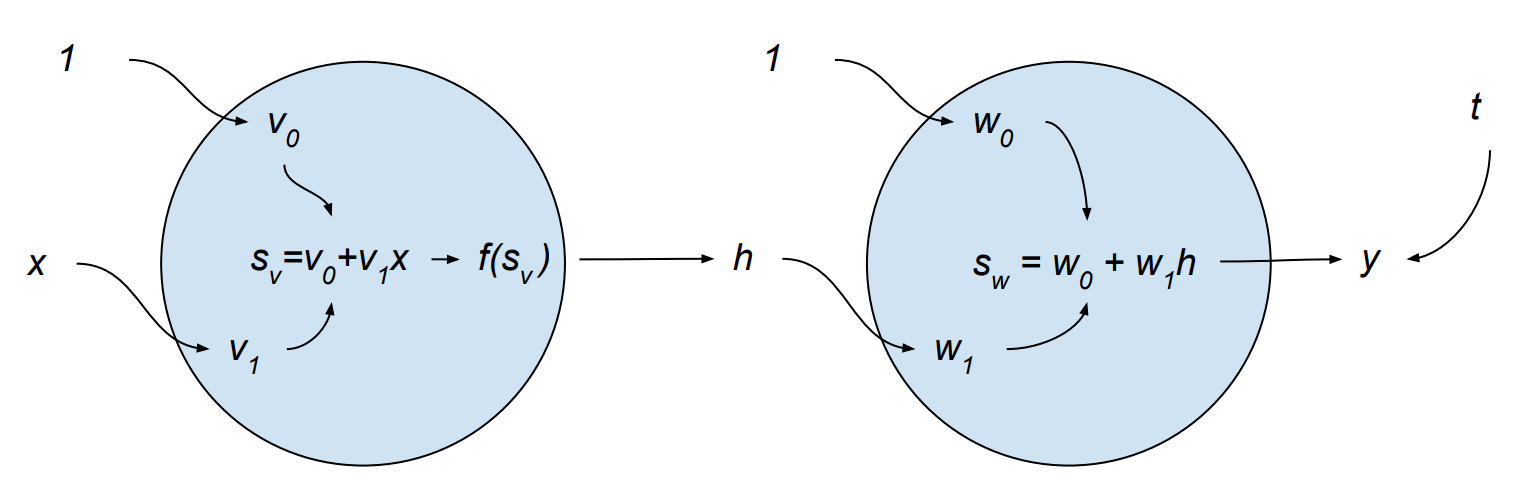

Working with just scalar values.

$$
\begin{align*}
E &= (t - y)^2\\
\frac{\partial E}{\partial w_0} &= -2 (t - y) \frac{\partial y}{\partial w_0}\\
\frac{\partial E}{\partial w_0} &= -2 (t - y) \frac{\partial (w_0 + w_1 h)}{\partial w_0}\\
\frac{\partial E}{\partial w_0} &= -2 (t - y)\\[3mm]
\frac{\partial E}{\partial w_1} &= -2 (t - y) \frac{\partial y}{\partial w_1}\\
\frac{\partial E}{\partial w_1} &= -2 (t - y) \frac{\partial (w_0 + w_1 h)}{\partial w_1}\\
\frac{\partial E}{\partial w_1} &= -2 (t - y) h\\[5mm]
\frac{\partial E}{\partial v_0} &= -2 (t - y) \frac{\partial y}{\partial v_0}\\
\frac{\partial E}{\partial v_0} &= -2 (t - y) \frac{\partial y}{\partial h} \frac{\partial h}{\partial v_0}\\
\frac{\partial E}{\partial v_0} &= -2 (t - y) \frac{\partial y}{\partial h} \frac{\partial h}{\partial s_v} \frac{\partial s_v}{\partial v_0}\\
\frac{\partial E}{\partial v_0} &= -2 (t - y) \frac{\partial (w_0+w_1 h)}{\partial h} \frac{\partial f(s_v)}{\partial s_v} \frac{\partial (v_0+v_1 x)}{\partial v_0}\\
\frac{\partial E}{\partial v_1} &= -2 (t - y) w_1 f'\\[3mm]
\frac{\partial E}{\partial v_1} &= -2 (t - y) \frac{\partial y}{\partial v_1}\\
\frac{\partial E}{\partial v_1} &= -2 (t - y) \frac{\partial y}{\partial h} \frac{\partial h}{\partial v_1}\\
\frac{\partial E}{\partial v_1} &= -2 (t - y) \frac{\partial y}{\partial h} \frac{\partial h}{\partial s_v} \frac{\partial s_v}{\partial v_1}\\
\frac{\partial E}{\partial v_1} &= -2 (t - y) \frac{\partial (w_0+w_1 h)}{\partial h} \frac{\partial f(s_v)}{\partial s_v} \frac{\partial (v_0+v_1 x)}{\partial v_1}\\
\frac{\partial E}{\partial v_1} &= -2 (t - y) w_1 f' x\\
\end{align*}
$$

Notice the common terms.  $-2(t-y)$ appears everywhere.  Let's call that $\delta_w$.

$$
\begin{align*}
\delta_w &= -2 (t - y)\\
\frac{\partial E}{\partial w_0} &= \delta_w\\
\frac{\partial E}{\partial w_1} &= \delta_w h
\end{align*}
$$

Now, in the hidden unit equations, we see the common term $-2(t-y) w_1 f'$.  Let's call this $\delta_v$.

$$
\begin{align*}
\delta_v &= -2 (t - y) w_1 f'\\
&= \delta_w w_1 f'\\
\frac{\partial E}{\partial v_0} &= \delta_v\\
\frac{\partial E}{\partial v_1} &= \delta_v x
\end{align*}
$$


Do you see the pattern?

We calculate $\delta_w$ in the output layer and pass it back to the hidden layer by multiplying it by the output unit weight, $w_1$ that connects the hidden unit to the output unit.  There we calculate $\delta_v$ by multiplying $\delta_w w_1$ by $f'$.  In both layers, the derivative of the error $E$ with respect to a weight is just its $\delta$ value times the input to the weight.

This is the error back-propagation process.  These equations are sometimes referred to as delta rules.

## Two Hidden Layers

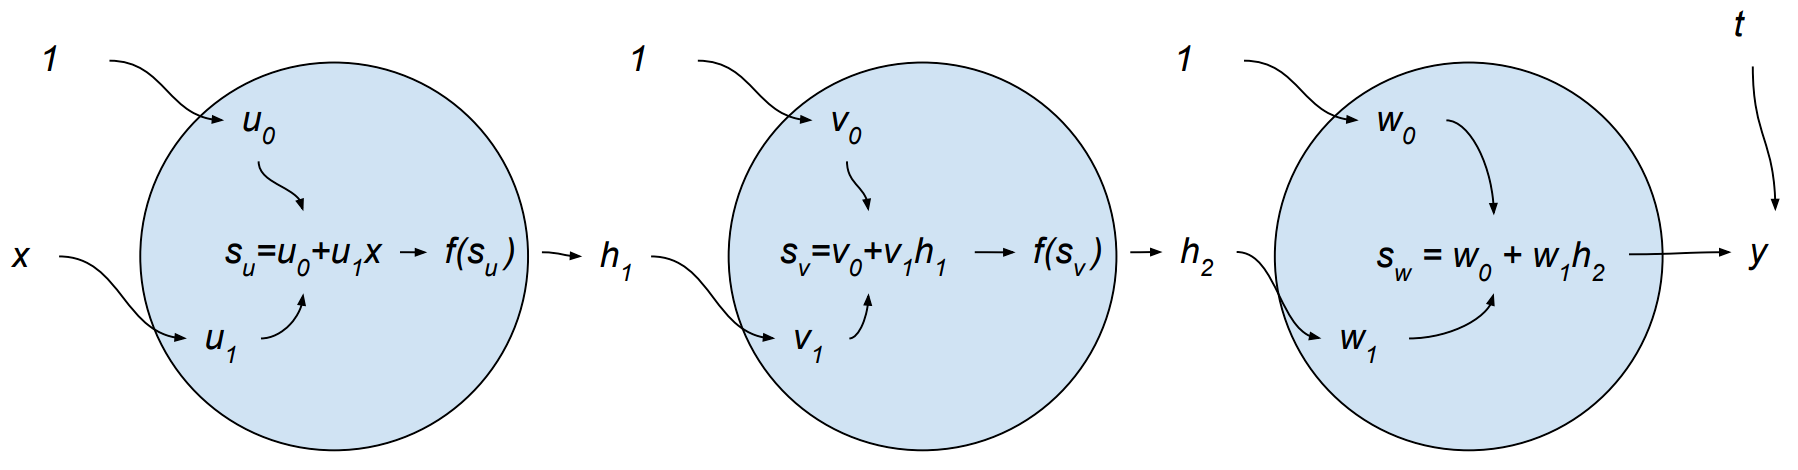

Two hidden layers look quite a bit more complicated, but following the pattern of the delta rule simplifies our equations.


$$
\begin{align*}
\delta_w &= -2 (t - y)\\
\delta_v &=  \delta_w w_1 f'\\
\delta_u &=  \delta_v v_1 f'\\[3mm]
\frac{\partial E}{\partial w_0} &= \delta_w\\
\frac{\partial E}{\partial w_1} &= \delta_w h_2\\[3mm]
\frac{\partial E}{\partial v_0} &= \delta_v\\
\frac{\partial E}{\partial v_1} &= \delta_v h_1\\[3mm]
\frac{\partial E}{\partial u_0} &= \delta_u\\
\frac{\partial E}{\partial u_1} &= \delta_u x
\end{align*}
$$

Now you see how we can continue this for even more hidden layers.

There is a little more complexity to deal with when we have more than one unit in each layer.  Rather than going through the derivation steps, let's jump into some python code to handle multiple layers and multiple units per layer.

# Error Back-Propagation in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_inputs = 1
n_hidden_units = [5, 4]  # 2 hidden layers having this many units
n_outputs = 2  # output layer has 2 units

In [4]:
def f(S):
    return np.tanh(S)

def df(fS):
    return (1 - fS ** 2)

In [15]:
def softmax(Y):
    fs = np.exp(Y)  # N x K
    denom = np.sum(fs, axis=1).reshape((-1, 1))
    return fs / denom

def make_indicator_vars(T):
    return (T == np.unique(T)).astype(int)

def percent_correct(T, Y):
    return 100 * np.mean(T == Y)

def add_ones(M):
    return np.insert(M, 0, 1, 1)

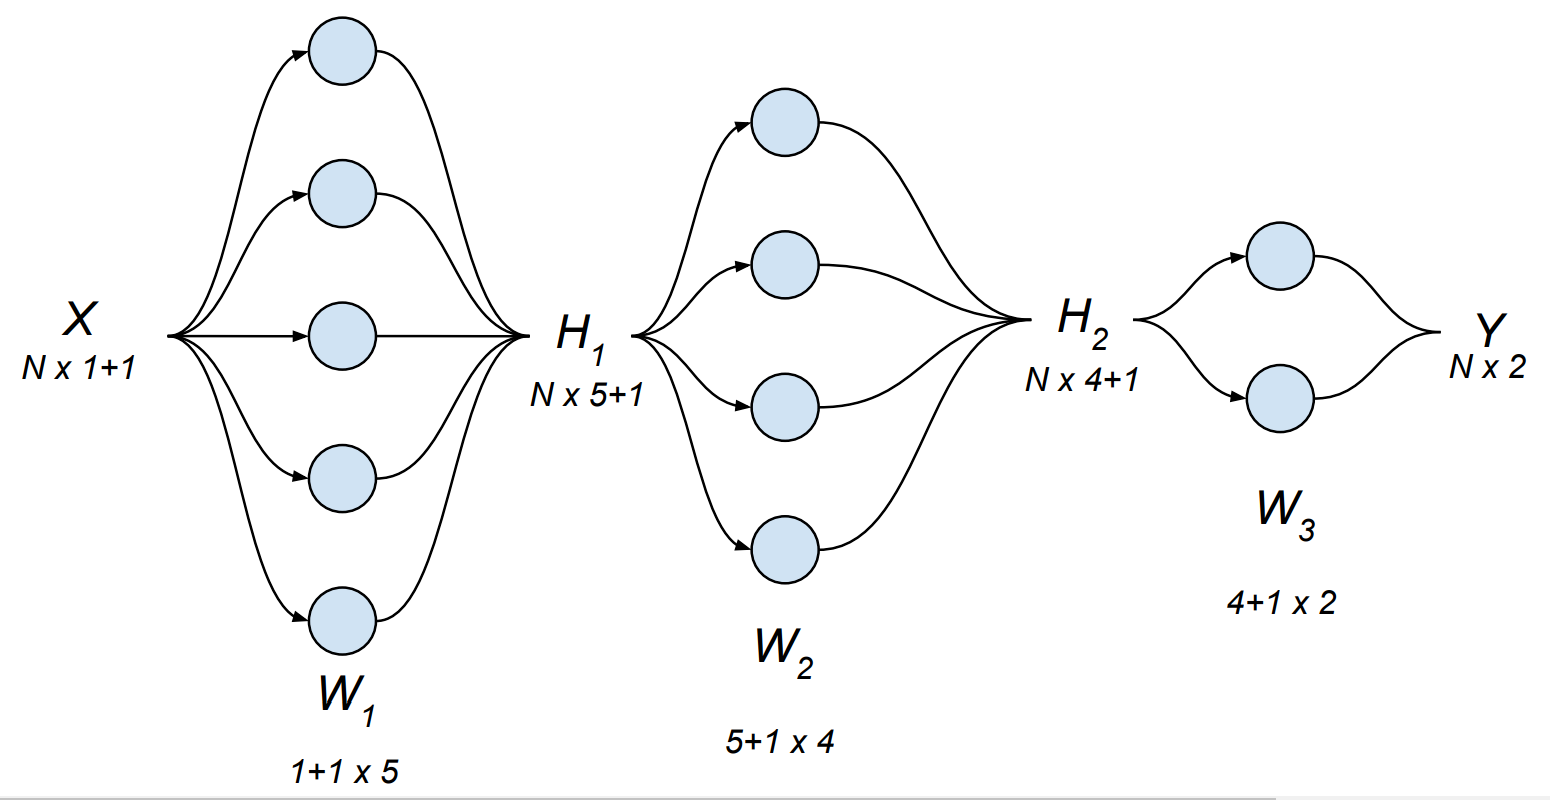

In [16]:
X = np.linspace(-10, 10, 20).reshape(-1, 1)
T = np.array([0] * 4 + [1] * 5 + [0] * 3 + [1] * 8).reshape(-1, 1)
classes = np.unique(T).reshape(-1, 1)
T_iv = make_indicator_vars(T)
X.shape, T.shape, T_iv.shape

((20, 1), (20, 1), (20, 2))

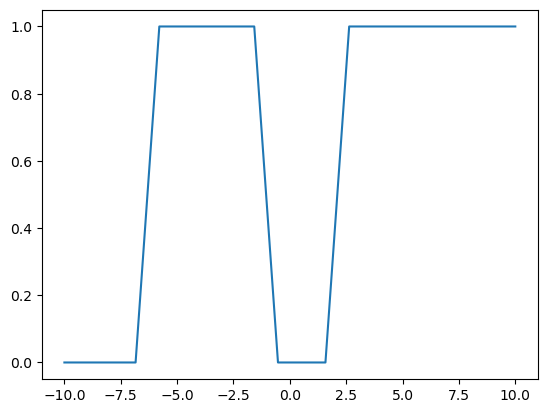

In [17]:
plt.plot(X, T);

In [95]:
def make_W(ni, nu):
    return np.random.uniform(-1, 1, size=(ni + 1, nu)) / np.sqrt(ni + 1)

W1 = make_W(n_inputs, n_hidden_units[0])
W2 = make_W(n_hidden_units[0], n_hidden_units[1])
W3 = make_W(n_hidden_units[1], n_outputs)

W1.shape, W2.shape, W3.shape                      

((2, 5), (6, 4), (5, 2))

In [96]:
H1 = f(add_ones(X) @ W1)
H2 = f(add_ones(H1) @ W2)
Y = add_ones(H2) @ W3
Y_softmax = softmax(Y)

X.shape, H1.shape, H2.shape, Y.shape

((20, 1), (20, 5), (20, 4), (20, 2))

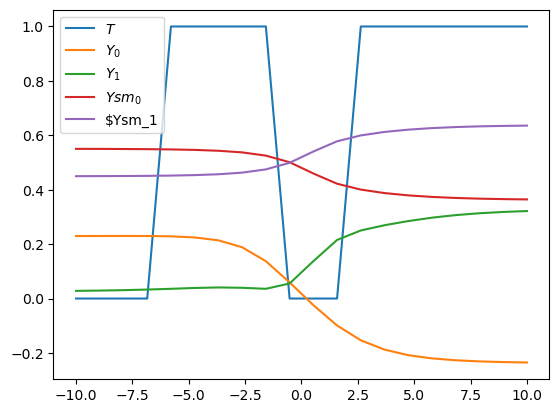

In [97]:
plt.plot(X, T)
plt.plot(X, Y)
plt.plot(X, Y_softmax)
plt.legend(('$T$', '$Y_0$', '$Y_1$', '$Ysm_0$', '$Ysm_1'));

In [104]:
W1 = make_W(n_inputs, n_hidden_units[0])
W2 = make_W(n_hidden_units[0], n_hidden_units[1])
W3 = make_W(n_hidden_units[1], n_outputs)

n_epochs = 1000
learning_rate = 0.02
n_samples = X.shape[0]

mse_trace = []
percent_correct_trace = []

for epoch in range(n_epochs):
    
    # Forward pass
    H1 = f(add_ones(X) @ W1)
    H2 = f(add_ones(H1) @ W2)
    Y = add_ones(H2) @ W3
    Y_softmax = softmax(Y)
    Y_classes = classes[np.argmax(Y_softmax, axis=1)]
    
    # Backward pass
    delta_w = -2 * (T_iv - Y_softmax)    
    delta_v = delta_w @ W3[1:, :].T * df(H2) 
    delta_u = delta_v @ W2[1:, :].T * df(H1)
   
   # Weight updates
    W3 -=learning_rate / n_samples * add_ones(H2).T @ delta_w
    W2 -= learning_rate / n_samples * add_ones(H1).T @ delta_v
    W1 -= learning_rate / n_samples * add_ones(X).T @ delta_u
    
    mse_trace.append(np.mean((T_iv - Y_softmax) ** 2))
    percent_correct_trace.append(percent_correct(T, Y_classes))

#     print(f'{delta_w.shape=}')
#     print(f'{delta_v.shape=}')
#     print(f'{delta_u.shape=}')
#     print(f'{W3.shape=}')
#     print(f'{W2.shape=}')
#     print(f'{W1.shape=}')

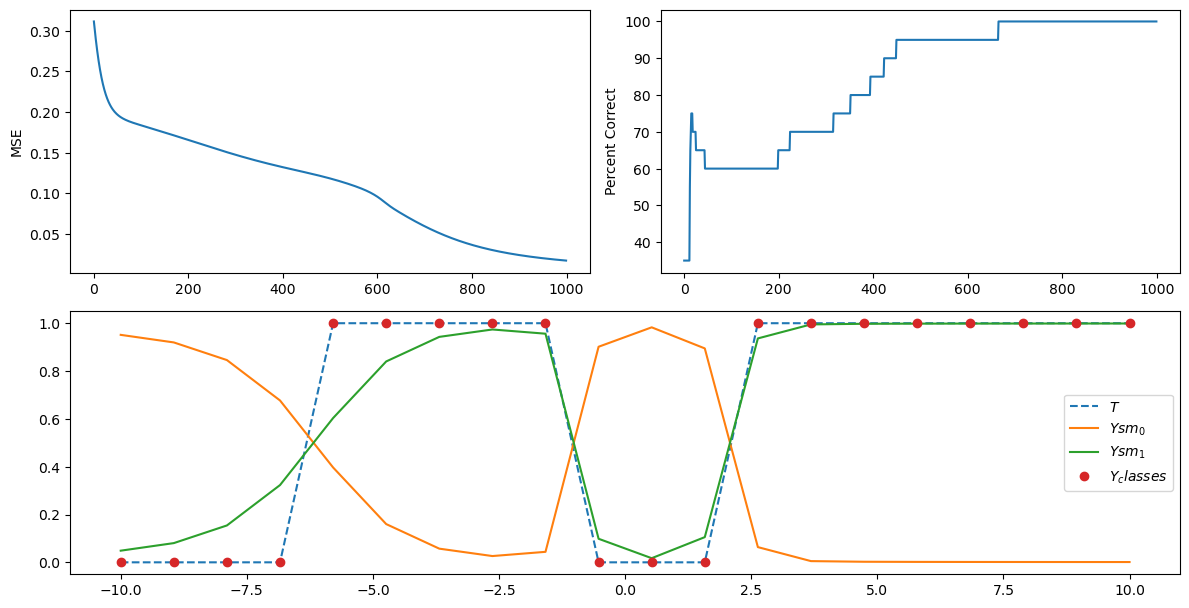

In [108]:
plt.figure(figsize=(12, 15))

plt.subplot(5, 2, 1)
plt.plot(mse_trace)
plt.ylabel('MSE')

plt.subplot(5, 2, 2)
plt.plot(percent_correct_trace)
plt.ylabel('Percent Correct')

plt.subplot(5, 1, 2)
plt.plot(X, T, '--')
plt.plot(X, Y_softmax)
plt.plot(X, Y_classes, 'o')
plt.legend(('$T$', '$Ysm_0$', '$Ysm_1$', '$Y_classes$'))

# plt.subplot(5, 1, 3)
# plt.plot(X, T, '--')
# plt.plot(X, Y)
# plt.legend(('$T$', '$Y_0$', '$Y_1$'))

# # What are the hidden layers doing?

# plt.subplot(5, 1, 4)
# plt.plot(X, H1)
# plt.ylabel('Hidden Layer 1')

# plt.subplot(5, 1, 5)
# plt.plot(X, H2)
# plt.ylabel('Hidden Layer 2')



plt.tight_layout()

For some fun over Spring Break, combine the above two code cells into one that uses `clear_output` and `display` from `Ipython.display` (as shown in Lecture Notes 04 and 09) to animate this training process by calling these plots every 50 epochs.